In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import sys
sys.path.insert(0, '..')  # bring the project folder to path
from parameters import *
from utils import *

# The next two lines are to make the notebook use the most updated code on one's computer
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
X = np.empty((N_SUBJECTS*4, N_PARCELS))
run = 0

for subj in list(subjects)*4: 
  ts_wm = load_timeseries(subj, 'wm', concat=True, remove_mean=True)
  X[subj, :] = get_condition_bold(subj,'wm','2bk_faces', run, ts_wm)
  X[N_SUBJECTS + subj, :] = get_condition_bold(subj,'wm','0bk_faces', run, ts_wm)
  X[2*N_SUBJECTS + subj, :] = get_condition_bold(subj,'wm','2bk_tools', run, ts_wm)
  X[3*N_SUBJECTS + subj, :] = get_condition_bold(subj,'wm','0bk_tools', run, ts_wm)

(1356, 360)


Text(0.5, 0, 'parcels')

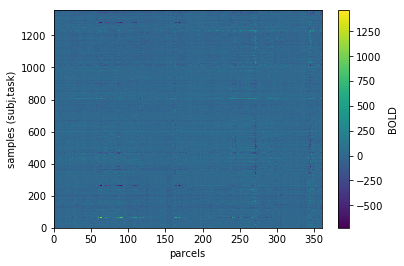

In [10]:
print(X.shape)
plt.pcolormesh(X)
plt.colorbar(label= "BOLD")
plt.ylabel('samples (subj,task)')
plt.xlabel('parcels')

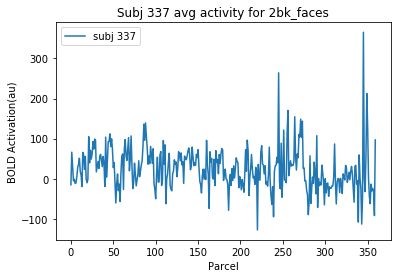

In [11]:
subj = 337
plt.figure()
ax=plt.plot(X[subj,:], label=f'subj {subj}') # 39 frames

plt.title(f'Subj {subj} avg activity for 2bk_faces')
plt.xlabel('Parcel')
plt.ylabel('BOLD Activation(au)')
plt.legend()

plt.show()

In [12]:
y = np.concatenate(([0]*N_SUBJECTS*2,[1]*N_SUBJECTS*2))
y.shape

(1356,)

In [13]:
# First define the model
log_reg = LogisticRegression(penalty="none")

#Then fit it to data
log_reg.fit(X, y)

acc_train = np.mean(log_reg.predict(X)==y)
print("Accuracy for training set =", acc_train)
predictions = log_reg.predict(X)

Accuracy for training set = 1.0


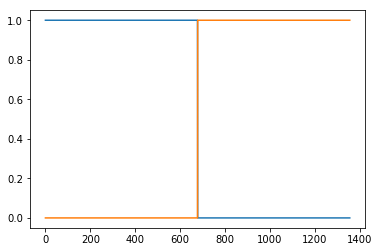

In [14]:
plt.plot(log_reg.predict_proba(X))

[0.99411765 0.97647059 0.97647059 0.98235294 0.95857988 0.96449704
 0.96449704 0.98224852]


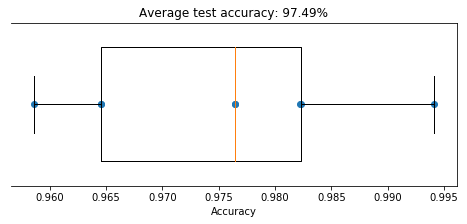

In [15]:
kfold=8  # k-fold crossvalidation
accuracies = cross_val_score(log_reg, X, y, cv=kfold) # k=8 crossvalidation

f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(kfold))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)
print(accuracies)

## L1 regularization

In [16]:
log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000)
log_reg_l1.fit(X, y)
acc_train_l1 = np.mean(log_reg_l1.predict(X)==y)
print("Accuracy for training set =", acc_train_l1)
predictions_l1 = log_reg_l1.predict(X)

Accuracy for training set = 1.0


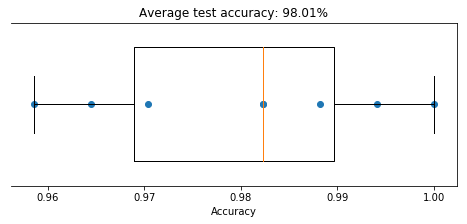

In [17]:
kfold=8  # k-fold crossvalidation
accuracies_l1 = cross_val_score(log_reg_l1, X, y, cv=kfold) # k=8 crossvalidation

f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies_l1, vert=False, widths=.7)
ax.scatter(accuracies_l1, np.ones(kfold))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies_l1.mean():.2%}"
)
ax.spines["left"].set_visible(False)